<a href="https://colab.research.google.com/github/safakan/CCTB_repo_safak_atakan_celik/blob/main/DEA113/Assignment4/Assignment4_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data**

In [137]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/safakan/CCTB_repo_safak_atakan_celik/refs/heads/main/DEA113/Assignment4/used_cars_data.csv"

data = pd.read_csv(url)

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Check Data**

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [125]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [132]:
# data.isnull().sum()
# percentage of missing values in each column
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [133]:
data.shape

(7253, 14)

Lets consider what we have:

- Inconsistency between kilometers driven and mileage
- value under new price, further check others
- Ideally should be all non null, but some columns have large nums of missing


cleaning notes:
- if it's small maybe just drop?

- for new price it's definitely trouble bcs 86 percent missing, but do this analysis overall and maybe just for the same car s old and new prices?

- overall insights later on...

- UNITS, while moving to the column name, make sure only the same values are mentioned, or process to new column.. there are many things to do here.

- I dont want to drop columns now, but checking mileageVSkilometerdriven
    - okay this turned out not erroneous
    - but the values inside are -- not even considered numeric columns...

new_price column is problematic
- why should keep it? no it seems. huge empty ratio, seems a bit irrelevant to the overall data


steps:



**start--playground-cell**

In [134]:
data[data["Mileage"].isnull()]
# two records here
## A.Name: Mahindra E Verito D4
## B.Name: Toyota Prius 2009-2016 Z4
## A, B: Milege NaN
### B: New_Price NaN

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


**end--playground-cell**

In [114]:
data[data["Name"] == "Mahindra E Verito D4"]
data[data["Name"] == "Toyota Prius 2009-2016 Z4"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


---



**Moving unit values from cells to field names**

In [96]:
# Engine
data.rename(columns={"Engine": "Engine_CC"}, inplace=True)

## missing values causing trouble here too...

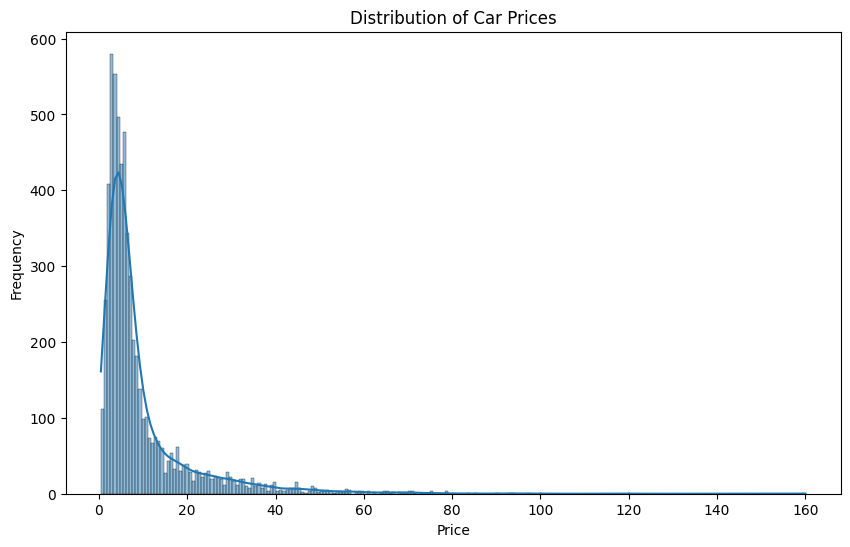

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

prices = data["Price"].dropna()
# Create the visualization
plt.figure(figsize=(10, 6))
sns.histplot(prices, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [150]:
# new_prices = data["New_Price"].dropna()
# Create the visualization
new_prices = data["New_Price"].dropna().apply(lambda x: x.split(" ")[0]).astype(float)

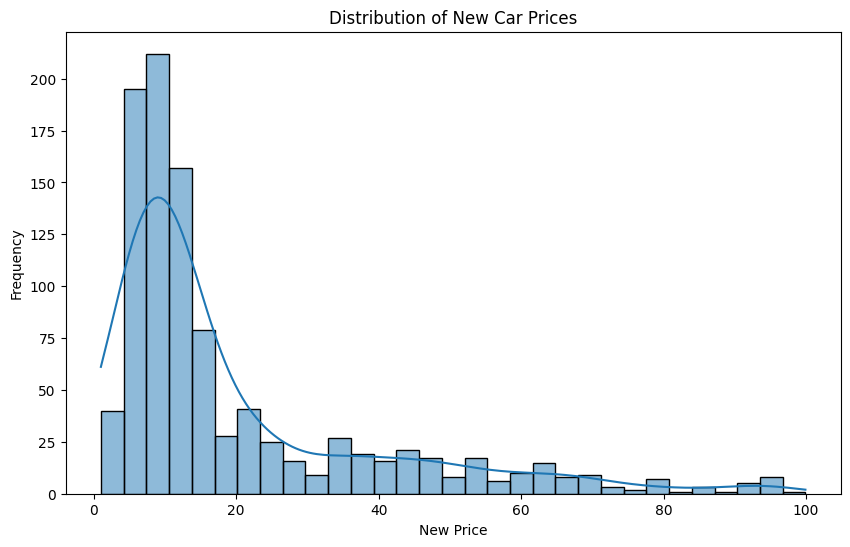

In [151]:
# prompt: use a variable called "new_prices" and create a line graph of distribution of this number

# Create the visualization
plt.figure(figsize=(10, 6))
sns.histplot(new_prices, kde=True)
plt.title('Distribution of New Car Prices')
plt.xlabel('New Price')
plt.ylabel('Frequency')
plt.show()

In [153]:
new_prices

,New_Price
count,1006.000000
mean,19.894324
std,19.813947
min,1.000000
25%,7.635000
50%,11.270000
75%,23.640000
max,99.920000


In [155]:
new_prices.isnull().sum()

0